# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

A tree model looks at a certain feature and uses some rule to decide what to do with it. It repeats this process over and over with differet feature until it reaches some satisfactory classification.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

Trees are more adept at handling non-linear relationships than linear models because they can handle more complex relationships through a 'decision-making' process rather than being limited to forcing variables into a linear relationship.

3. Why is the Gini a good loss function for categorical target variables? 

Gini's measure how mixed up classes are in a group, making ideal for rating a model that is trying to sort for a categorical target variable.

4. Why do trees tend to overfit, and how can this tendency be constrained? 

Trees can keep on splitting data over and over to make groups as specific as possible but this process does not generalize well when used on unseen test data. A limit on how much something can be split can be used to prevent this.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

False - trees can be effective at finding ranges for which to split numerical values making them valuable for situations with numerical variable as well.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Limiting to two branches after a split prevents overfitting and keeps the model simple. The more splits per branch, the worse the model will generalize to unseen data.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

A model that does very well on training data then poorly on test data is almost certainly overfitting. On the other hand, if the model isn't even super effective on training data it is likely underfitting and not complex enough.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./data/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


**Part 2**

In [3]:
categorical_variables = ["Make", "Color", "Body_Type", "No_of_Owners", "Fuel_Type", "Transmission", "Transmission_Type"]
numeric_variables = ["Mileage_Run", "Make_Year", "Seating_Capacity"]
target = "Price"

df_dummies = pd.get_dummies(df[categorical_variables], drop_first=True)

df_numeric = df[numeric_variables]

X = pd.concat([df_dummies, df_numeric], axis=1)

y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Part 3**

In [5]:

r2_scores = []

for leaf_size in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((leaf_size, r2))

best_leaf, best_r2 = max(r2_scores, key=lambda x: x[1])

print("Best min leaf:", best_leaf)
print("Highest test R^2", best_r2)

Best min leaf: 5
Highest test R^2 0.8253410511223336


**Part 4**

R2 on test set: 0.8228418832488933
RMSE on test set: 142545.55655889618


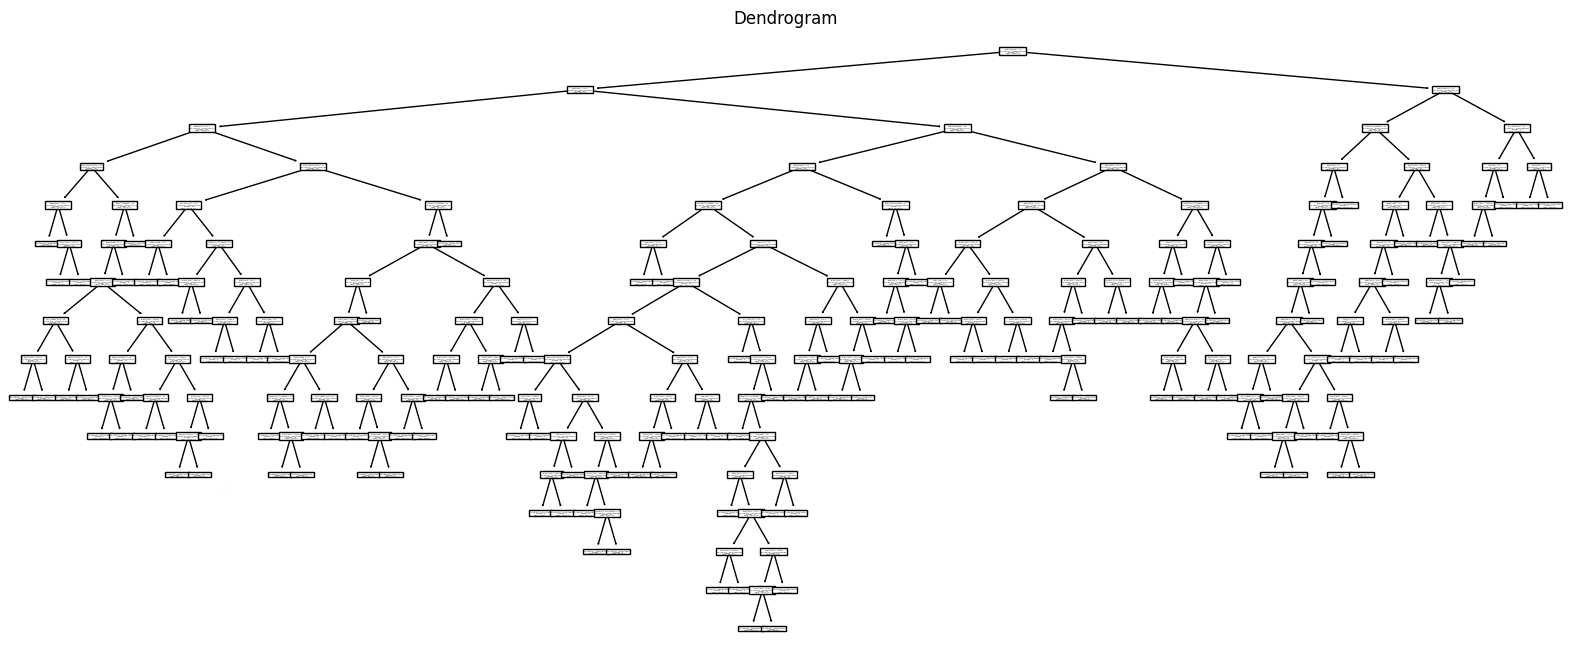

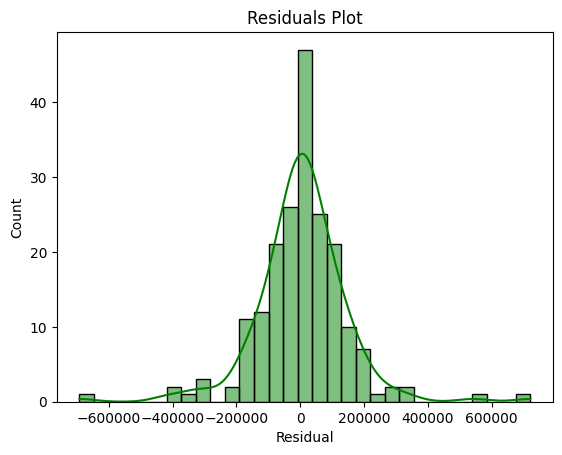

In [7]:
final_model = DecisionTreeRegressor(min_samples_leaf=5, random_state=19203)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 on test set:", r2)
print("RMSE on test set:", rmse)

# make dendrogram plot
plt.figure(figsize=(20, 8)) #needs to be wide
plot_tree(final_model, feature_names=X.columns)
plt.title("Dendrogram")
plt.show()

residuals = y_test - y_pred

# Residuals
sns.histplot(residuals, kde=True, color = 'green')
plt.title("Residuals Plot")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

The desity looks to be roughly symmetric, with a peak at 0. It also looks to be centered around 0.

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Linear R^2:", r2_lin)
print("Linear RMSE:", rmse_lin)

Linear R^2: 0.8202733305994376
Linear RMSE: 143575.19660568377


The results were slightly better for the tree than the linear model.

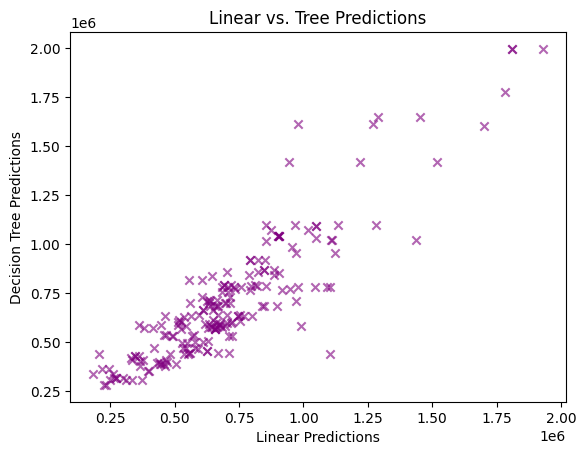

In [13]:
y_pred_tree = final_model.predict(X_test)
y_pred_lin = lin_reg.predict(X_test)

plt.scatter(y_pred_lin, y_pred_tree, marker = 'x', color='purple', alpha = 0.6)
plt.xlabel("Linear Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Linear vs. Tree Predictions")
plt.show()

As we would expect, the models make very similar predictions for most of the prices. The primary distinction looks to be in how the two models handle higher prices cars. In general, the decision tree appears to raise the prices of expensive cars to eve higher levels than the linear model.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [15]:
df = pd.read_csv('./data/Breast Cancer METABRIC.csv')
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [16]:

numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

df_cat = pd.get_dummies(df[categorical_vars], drop_first=True)

df_num = df[numeric_vars]
X = pd.concat([df_num, df_cat], axis=1)

**Part 3**

Accuracy: 0.5994962216624685


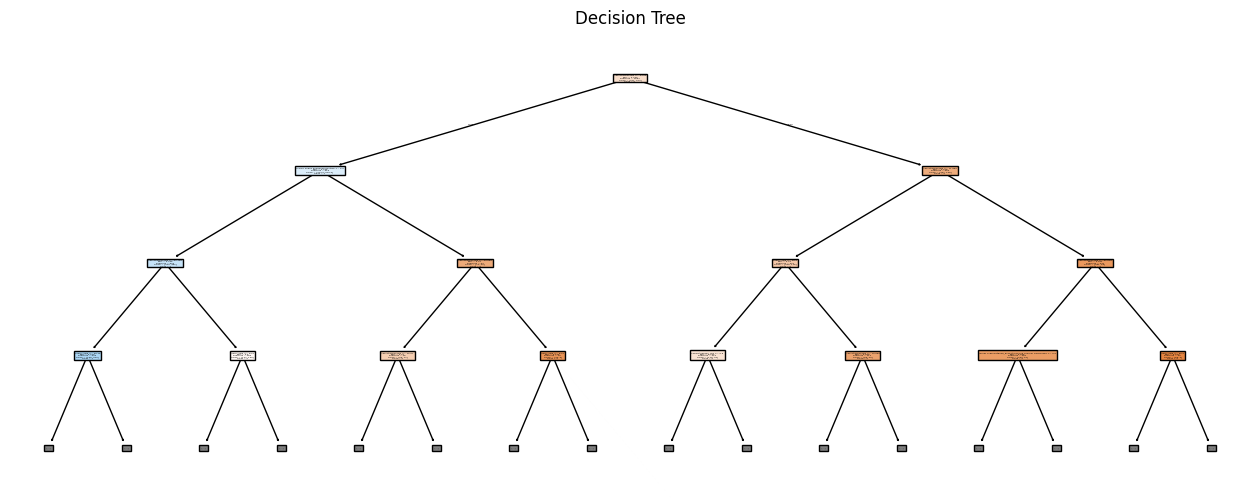

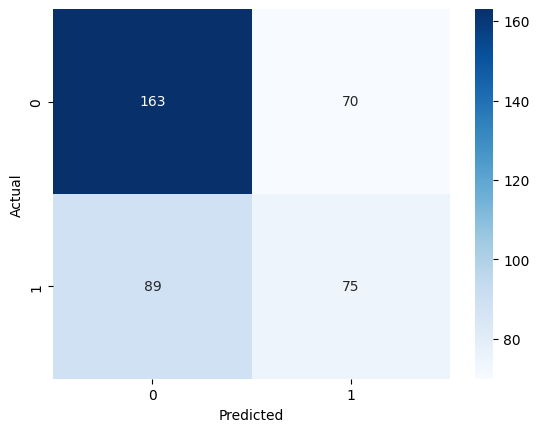

In [19]:
df_clean = df.dropna(subset=['Overall Survival Status'])

X_clean = X.loc[df_clean.index]
y = df_clean['Overall Survival Status']

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)

plt.figure(figsize=(16, 6))
plot_tree(clf, feature_names=X.columns, class_names=["0", "1"], filled=True, max_depth=3)
plt.title("Decision Tree")
plt.show()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("True Positive Rate:", tpr)
print("True Negative Rate:", tnr)

True Positive Rate: 0.4573170731707317
True Negative Rate: 0.6995708154506438


The true negative rate is much better than the true positive rate.

**Part 5**

Best min_samples_leaf: 122
Best R2 on test set: 0.13390305753036313


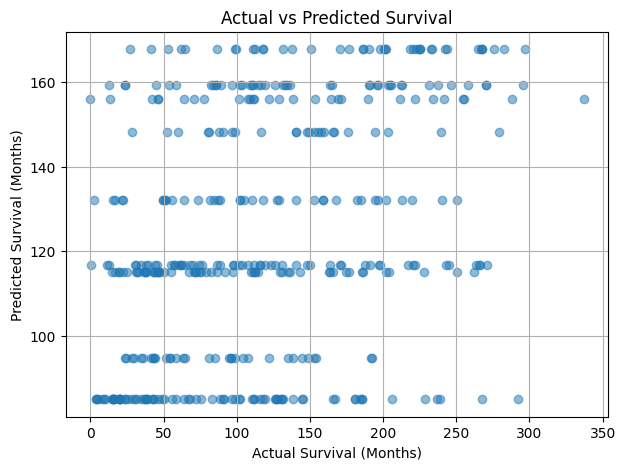

In [21]:
df_reg = df.dropna(subset=['Overall Survival (Months)'])

X_reg = X.loc[df_reg.index]
y_reg = df_reg['Overall Survival (Months)']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

r2_scores = []

for leaf in range(1, 150):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((leaf, r2))

best_leaf, best_r2 = max(r2_scores, key=lambda x: x[1])
print("Best min_samples_leaf:", best_leaf)
print("Best R2 on test set:", best_r2)

final_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Actual vs Predicted Survival")
plt.grid(True)
plt.show()

This plot as well as the R^2 being 0.134 show that there is not too much value to this model as it is not very effective in prediciting survival and thus using it in a clinical would likely cause more harm than good. 

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?